---

Universidade Federal de Uberlândia

Faculdade de Engenharia Elétrica

Imagens Médicas 2

Discente: Levy Gabriel da S. G.

---

In [1]:
from IPython.display import Image
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

def imageNcaption(filename, caption):
    display(Image(filename=filename))
    print(caption)

# Tarefa 4 - Histograma

Nesta tarefa será estudado a geração e interpretação do histograma de uma imagem médica. Serão utilizadas as ferramentas ImageJ e a linguagem Python para as análises. Inicialmente todas as análises serão feitas no ImageJ, em seguida partindo para o Python.

## ImageJ

Segue abaixo a visualização da imagem a ser analisada na figura 1 e o seu respectivo histograma gerado no ImageJ na figura2.

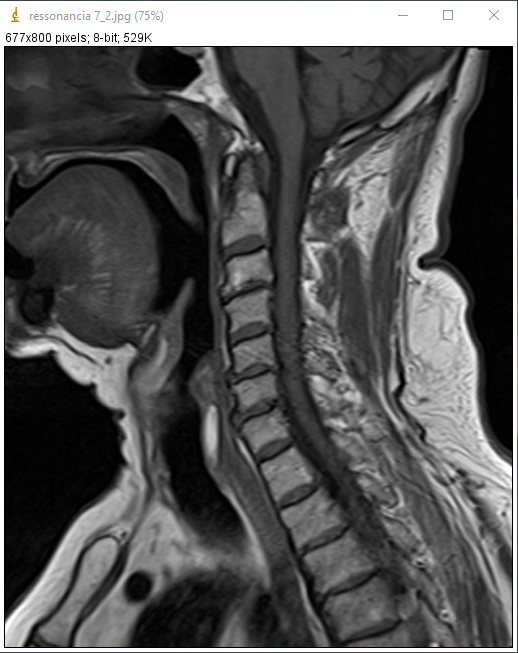

Figura 1 - Imagem a ser analisada, visualizada no ImageJ.


In [2]:
imageNcaption('figura1.png', 'Figura 1 - Imagem a ser analisada, visualizada no ImageJ.')

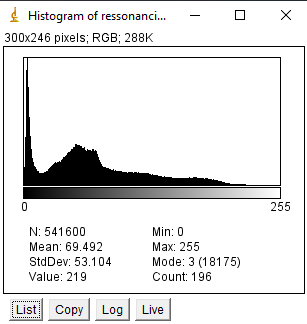

Figura 2 - Histograma da imagem a ser analisada, gerado no ImageJ.


In [3]:
imageNcaption('figura2.png', 'Figura 2 - Histograma da imagem a ser analisada, gerado no ImageJ.')

Da figura 2 pode-se observar algumas características da imagem original, sendo algumas dessas:

- **Média = 69.492**;
- **Desvio padrão = 53.104**;

Em seguida, ainda no ImageJ, a imagem original foi submetida a um realce em seu contraste por meio da equalização do histograma. A figura 3 ilustra a caixa de configurações, levando em conta o uso de pixels saturados de 0.3%.

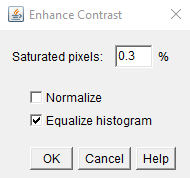

Figura 3 - Configurações para o realce da imagem.


In [4]:
imageNcaption('figura3.png', 'Figura 3 - Configurações para o realce da imagem.')

Os resultados do realce podem ser observados na imagem modificada da figura 4 e no histograma da figura 5. Observa-se na imagem um equilíbrio dos tons de cinza, permitindo identificar toda a imagem com alto contraste. Já o efeito no histograma foi o espalhamento da distribuição dos níveis de cinza.

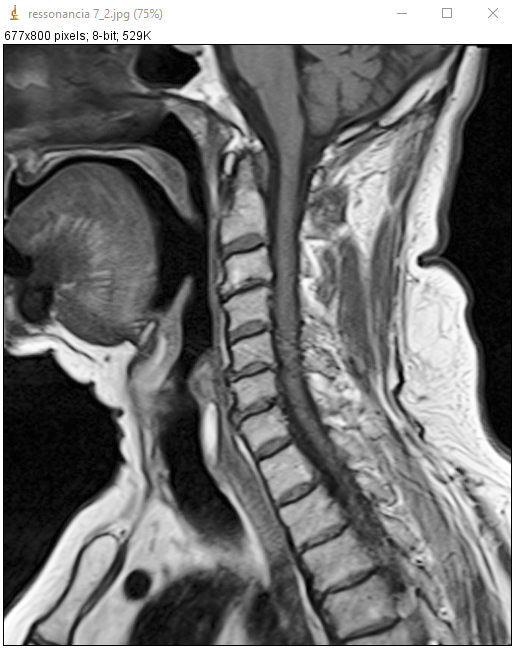

Figura 4 - Imagem realçada pela equalização do histograma.


In [5]:
imageNcaption('figura4.png', 'Figura 4 - Imagem realçada pela equalização do histograma.')

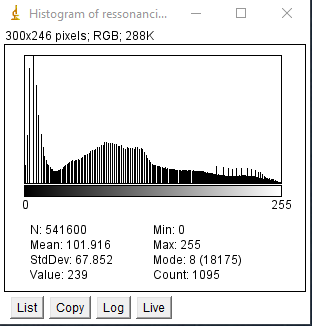

Figura 5 - Histograma da imagem realçada.


In [6]:
imageNcaption('figura5.png', 'Figura 5 - Histograma da imagem realçada.')

Retornando às características da imagem, agora voltando a atenção para a imagem realçada, observa-se uma alteração na média e do desvio padrão de acordo com a figura 5 do histograma. Esses valores são:

- **Média = 101.916**;
- **Desvio padrão = 67.852**;

Agora a mesma análise será feita por meio da linguagem Python.

## Python

O primeiro passo é carregar e apresentar a imagem original, como indicado no trecho de código abaixo.

In [7]:
img = image.imread('ressonancia 7_2.jpg')

Em seguida será feita uma função para gerar o histograma de uma imagem de interesse. Essa função será usada para calcular o histograma da imagem original e da imagem que será realçada em passos futuros.

In [8]:
def histogram(img):
    N, M = img.shape
    n = N*M
    bins, hist = np.unique(img.flatten(), return_counts=True)
    
    fig, ax = plt.subplots(1,2)
    
    ax[0].stem(bins, hist, linefmt='-k', markerfmt=' ', basefmt=' ')
    ax[1].imshow(img, cmap='gray')
    #ax[1].stem(bins/n, hist/n, linefmt='-k', markerfmt='k', basefmt='')

    ax[0].set_title('Histogram')
    ax[1].set_title('Image')

    ax[0].set_xlabel('Levels')
    ax[0].set_ylabel('Counting of levels')
    
    ax[1].grid(False)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    
    fig.set_size_inches(10,4)
    
    return bins, hist

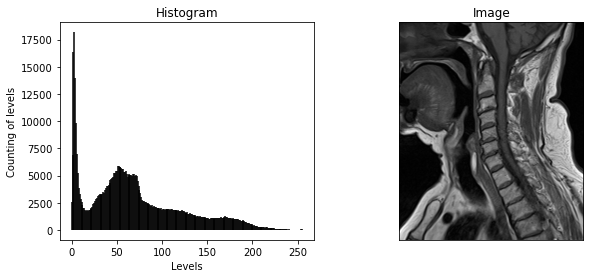

In [9]:
_, _ = histogram(img)

Valida-se o histograma ao comparar o gerado acima pelo código em Python com o ImageJ. Agora o próximo passo é verificar se a média e o desvio padrão correspondem com aqueles obtidos no ImageJ.

In [10]:
print('Média = ' + str(img.mean()))
print('Desvio padrão = ' + str(img.std()))

Média = 69.49230612998522
Desvio padrão = 53.10356979247178


Para realizar a equalização do histograma, a função abaixo deve ser executada. Ela obtém a soma acumulativa do histograma e a normaliza para, em seguida, aplicar a transofrmação em cada pixel da imagem. Em seguida retorna a iamgem equalizada.

In [11]:
def equalize_histogram(img):
    _, hist = np.unique(img.flatten(), return_counts=True) # histogram
    N, M = img.shape
    n = N*M
    cumsum_norm = np.round(hist.cumsum()*255/n)-1
    img_new = cumsum_norm.astype('uint8')[img] # apply cumulative sum to image
    
    return img_new

Assim, para observar os efeitos da equalização do histograma, basta executar o código da equalização para obter a nova imagem e, em seguida, executar no script anterior do histograma.

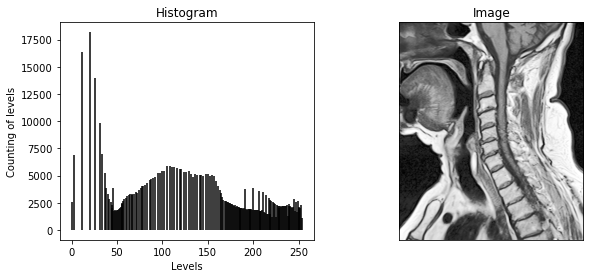

In [12]:
img_new = equalize_histogram(img)
_, _ = histogram(img_new)

Visualmente os resultados se assimilam aos obtidos no ImageJ, porém a média e o desvio padrão ainda devem ser avaliados para conclusões finais.

In [13]:
print('Média = ' + str(img_new.mean()))
print('Desvio padrão = ' + str(img_new.std()))

Média = 127.57953655834564
Desvio padrão = 72.96113795056078


Apesar dos valores de média e desvio padrão divergirem do ImageJ, estes acompanham a mesma tendência, com aumento em ambos os valores. A divergência pode ser oriunda de diferenças como os cáclulos foram feitos.